# Time Series analysis using prophet mdoel 

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
# load the dataset 
import pandas as pd
# specifiying the file path 
file_path = r'C:\Users\Basit\Desktop\Machine Learning and Deep Learning\07-Time-series-analysis\DailyDelhiClimateTrain.csv'
# treating date column as index column 
df = pd.read_csv(file_path,index_col='date',parse_dates=True)



In [3]:
# first five rows of data 
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
# basic informattion about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

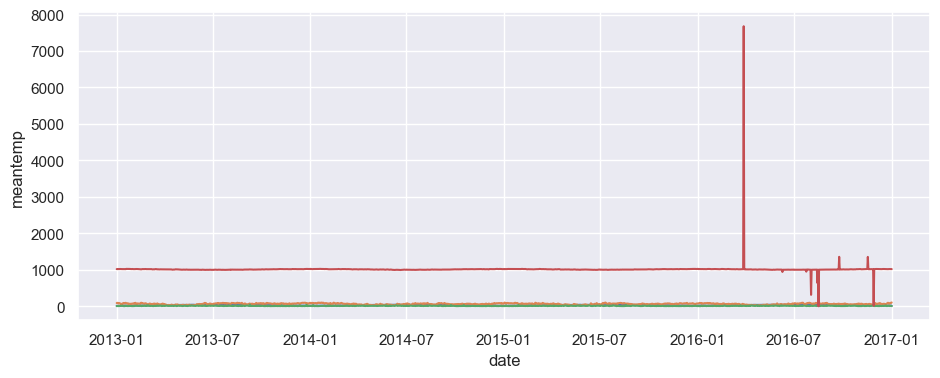

In [6]:
# setting the figure parameters 
sns.set(rc={'figure.figsize':(11,4)},font_scale=1,style='darkgrid')
# drawing first variable 
sns.lineplot(data=df,x='date',y='meantemp')
sns.lineplot(data=df,x='date',y='humidity')
sns.lineplot(data=df,x='date',y='wind_speed')
sns.lineplot(data=df,x='date',y='meanpressure')

In [7]:
# drawing the same plot with plotly 
px.line(df,x=df.index,y='meantemp')

In [8]:
import plotly.graph_objects as go

# Assuming df is your DataFrame with DateTime index
# Extracting data for plotting
x = df.index  # Assuming DateTime index
y1 = df['meantemp']
y2 = df['meanpressure']

# Create line plots for meantemp and pressure
trace1 = go.Scatter(x=x, y=y1, mode='lines', name='Mean Temperature')
trace2 = go.Scatter(x=x, y=y2, mode='lines', name='Pressure')

# Create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)

# Update layout
fig.update_layout(title='Trend of Mean Temperature and Pressure',
                  xaxis_title='Date',
                  yaxis_title='Value')

# Show the plot
fig.show()


In [9]:
# finding correlation of meantemp and humitidy
fig =px.scatter(df, x='meantemp',y='humidity',title='Mena temperature vs Humidity',
                trendline='ols',trendline_color_override='red')
fig.show()

In [10]:
# correlation of meantemp and humidity
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'],df['humidity'])
print(f'pearson correlation: %.3f' % corr)

pearson correlation: -0.572


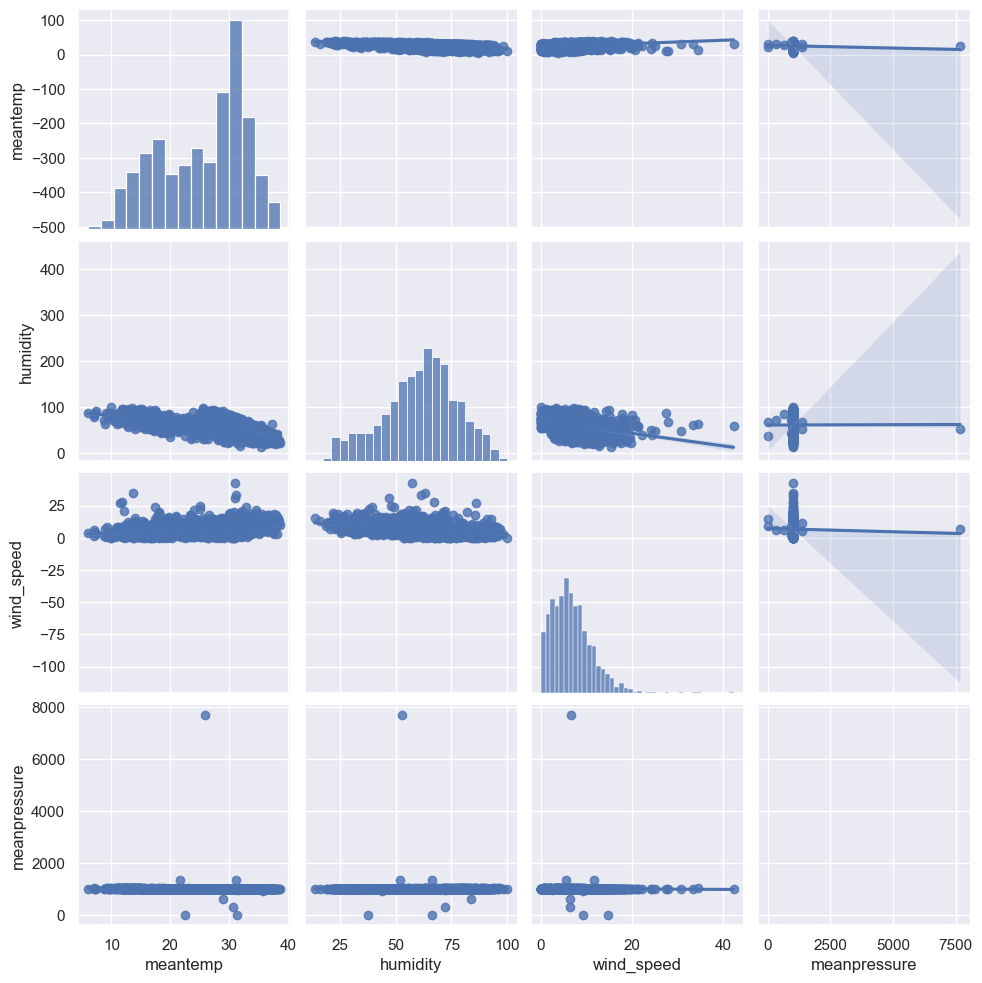

In [11]:
# making a pairplot of df 
sns.pairplot(df,kind='reg')

<Axes: >

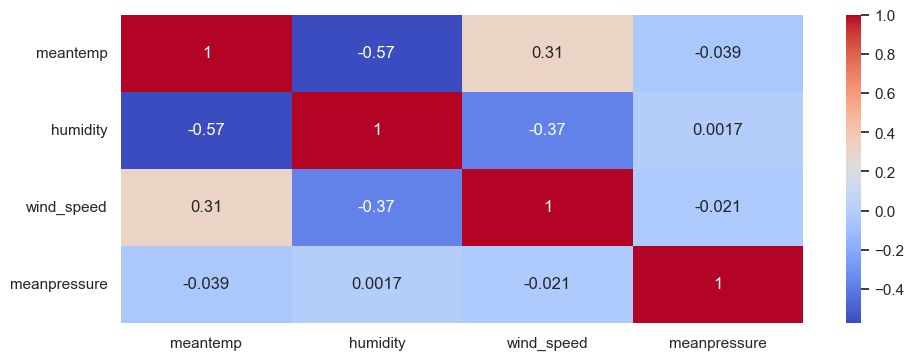

In [12]:
# making a correlation plot 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [13]:
# lets scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns,index=df.index)
df_scaled.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.595933,0.546868,0.161113,0.132009
std,0.224614,0.193709,0.108044,0.023460
min,0.000000,0.000000,0.000000,0.000000
25%,0.393013,0.426774,0.082307,0.130770
50%,0.663755,0.568276,0.147363,0.131679
75%,0.773540,0.679094,0.218812,0.132509
max,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='date', ylabel='meantemp'>

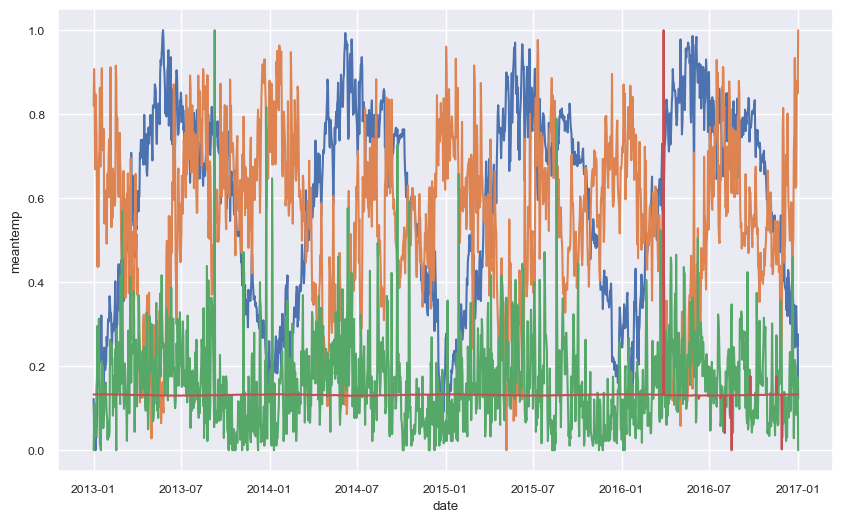

In [14]:
# making lineplot using scaled data 
sns.set(rc={'figure.figsize':(10,6)},style='darkgrid',font_scale=0.8)
sns.lineplot(df_scaled,x='date',y='meantemp')
sns.lineplot(df_scaled,x='date',y='humidity')
sns.lineplot(df_scaled,x="date",y="wind_speed")
sns.lineplot(df_scaled, x="date", y="meanpressure")


In [15]:
# dealing with outlier in mean pressure column 
df.loc['28-03-2016','meanpressure']=np.nan
df['meanpressure']=df['meanpressure'].interpolate(method='time')
df.loc['28-03-2016','meanpressure']


1012.0625

In [16]:
# let break down date column into year and month
df_scaled['month']=df_scaled.index.month
df_scaled['year']=df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,0.122271,0.820957,0.000000,0.132603,1,2013
2013-01-02,0.042795,0.907591,0.070583,0.132881,1,2013
2013-01-03,0.035662,0.849835,0.109743,0.132994,1,2013
2013-01-04,0.081514,0.668867,0.029212,0.132799,1,2013
2013-01-05,0.000000,0.847910,0.087636,0.132712,1,2013


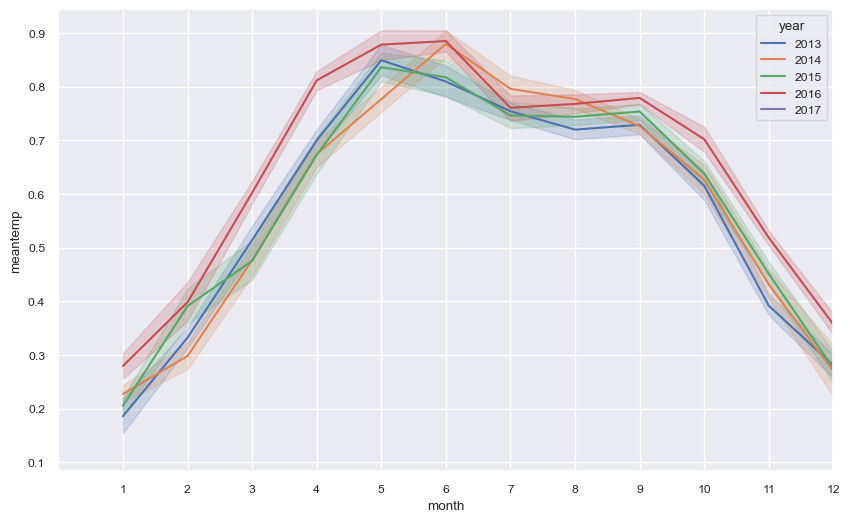

In [17]:
# let's see meantemp acrros different years in different months 
sns.lineplot(data=df_scaled,x='month',y='meantemp',hue='year',palette='deep')
plt.xlim(0,12)
plt.xticks(np.arange(1,13,1))
plt.show()

In [18]:
fig = px.line(df_scaled,x=df_scaled.index,y='meantemp',color='year')
fig.show()

## let's use prophet model for modeling of time series data 


In [19]:
# let's rename the columns for prphet model
df = pd.read_csv(file_path)
df =df.rename(columns={'date':'ds','meantemp':'y'})
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [21]:
# importing prophet 
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly


# initalizing the model
model = Prophet()
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
predication = model.predict(forecast)
forecast= model.predict(forecast)

# plot this model
plot_plotly(model,forecast)

12:18:08 - cmdstanpy - INFO - Chain [1] start processing
12:18:08 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
predication.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.296863,14.165147,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.237402,14.659720,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.561368,14.586704,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.247555,14.333227,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.283660,14.377015,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373
